In [1]:
#import all the libraries 
import time
from datetime import date, timedelta,datetime
import matplotlib.pyplot as plt 
from bs4 import BeautifulSoup
import csv
#importing library and then initiating a chrome session and making request to login page of instagram
from selenium import webdriver
driver = webdriver.Chrome(executable_path = '/Users/Akshay/Downloads/chromedriver')
driver.get('https://www.instagram.com/')

In [2]:
#searching for the username option and the fill the desired username to the send_keys function replacing USERNAME as a parameter 
username= driver.find_element_by_name("username")
username.send_keys("USERNAME")
#searching for the username option and the fill the desired password to the send_keys function replacing PASSWORD as a parameter
password= driver.find_element_by_name("password")
password.send_keys("PASSWORD")
#search for the submit button using xpath and class name and press on submit button 
sub= driver.find_element_by_xpath('//button[contains(@class, "sqdOP")]')
sub.submit()
#give time to login 
time.sleep(4)
#press not now button
notnow= driver.find_element_by_xpath('//div/button[contains(@class, "aOOlW   HoLwm")]')
notnow.click()


In [3]:
#now to get the list of top 10 user accounts on searching food 

#now go to the search bar and type the text food to it 
s= driver.find_element_by_xpath('//input[contains(@class, "XTCLo")]')
s.send_keys("food")
time.sleep(2)
#this opens a dialogue box with list of elements extract top 10 accounts from it 
a= driver.find_elements_by_xpath('//a[contains(@class, "-qQT3")]')
links=list()
#now we check the link and see if they are tags or accounts we skip the tags and store only accounts in the links list and as soon as it reaches the llength of 10 we break the loop 
for i in a:
    t=i.get_attribute("href")
    if "tags" in t:
        pass
    else:
        links.append(t)
    if len(links)==10:
        break
time.sleep(1)
#now we declare two dictionary and one to store username and no of followers and other to store username and its link 
d=dict()
usn_link=dict()
#we iterate the list of links and get to the page one by one to extract the number of followers they have 
for i in links:
    driver.get(i)
    time.sleep(5)
    b= driver.find_element_by_xpath('//a/span[contains(@class, "g47SY")]')
    #to get number of followers and then conver the string to integer by removing the commas and then store username followers and links in two dict  
    val=b.get_attribute('title')
    val=int(val.replace(",",""))
    c=driver.find_element_by_xpath('//h2[contains(@class, "_7UhW9       fKFbl yUEEX   KV-D4              fDxYl     ")]')
    k=c.get_attribute('innerHTML')
    d[k]=d.get(k,0)+val
    usn_link[k]=i
time.sleep(1)
#now we sort that and get top 5 out of them 
s = sorted(d.items(), key=lambda item: item[1], reverse=True)
s=s[:5]
top5=dict()
for i in s:
    top5[i[0]]=i[1]
for i in top5:
    print(i,top5[i])

foodnetwork 11063935
yourfoodlab 1576738
dilsefoodie 719529
foodie_incarnate 250533
delhifoodwalks 135478


In [4]:
#now go to the search bar and type the text food to it 
freq=dict()
hashtags=dict()
for i in top5:
    #we extract the link from the username and then make a get request to that page 
    page_to_go=usn_link[i]
    driver.get(page_to_go)
    time.sleep(5) 
    pics= driver.find_elements_by_xpath('//div[contains(@class, "v1Nh3 kIKUG  _bz0w")]/a')
    li=list()
    #now we find out the link of all the post and then store their links and then short that to top10
    for j in range(len(pics)):
        li.append(pics[j].get_attribute("href"))
    li=li[:10]
    
    #now we iterate over the post make a get request to them one by one and then make get requests to them and findout each and every word
    for k in li:
        driver.get(k)
        time.sleep(2)
        val=driver.find_element_by_xpath('//div[contains(@class, "C4VMK")]/span')
        html=val.get_attribute("innerHTML")
        d=BeautifulSoup(html,"html.parser")
        #now we will iterate over the entire text and then split them based on spaces and then store the words in a dictionary 
        #and then count their frequency and in another list we will store the number of hashtags and their frequency 
        for t in d.strings:
            words=t.split()
            for j in words:
                if j!="." :
                    freq[j]=freq.get(j,0)+1
                if j[0]=='#':
                    hashtags[j]=hashtags.get(j,0)+1
for i in freq:
    print(i,freq[i])

We 8
know 14
feta 1
is 49
alllll 1
the 86
rage 1
right 3
now, 1
but 2
can 8
we 7
just 4
take 2
a 51
short 1
timeout 1
and 92
discuss 1
warm, 1
creamy 1
goat 1
cheese 3
wrapped 1
in 44
phyllo? 1
⁠ 7
Link 5
bio 7
to 63
subscribe 2
@discoveryplus 4
stream 4
more 4
#BarefootContessa 1
episodes. 1
#discoveryplus 4
Search 1
for 29
@inagarten 1
's 4
Warm 1
Goat 1
Cheese 4
Phyllo 1
recipe 15
on 26
FoodNetwork.com. 1
If 3
your 7
favorite 2
part 2
of 48
chicken 1
pot 1
pie 1
crust, 1
THIS 1
IS 2
FOR 1
YOU 2
👏👏👏⁠ 1
.⁠ 3
All-Crust 1
Sheet 1
Pan 1
Chicken 5
Pot 1
Pie! 1
Recipe 9
Day: 2
@kardeabrown 1
Soy 1
Molasses 1
Salmon 1
😋 1
Get 3
recipe: 3
http://foodtv.com/3qctXxM 1
(Head 4
our 17
IGTV 4
get 5
clickable 4
link!) 2
💡 1
Cold 1
Brew 1
Coffee 1
*NOT* 1
same 4
thing 1
as 11
iced 1
coffee 2
🙅‍♂️ 1
And 4
@AltonBrown 1
here 4
explain 1
why 1
☕️⁠ 1
🎉 1
Three 1
brand-new 1
episodes 3
#GoodEatsTheReturn 1
are 13
streaming 1
NOW 2
only 2
, 2
new 2
will 7
drop 1
every 1
Thursday! 1
🎉⁠ 1
Subscribe 2
at 15

In [6]:
#now we create a list and then store them in form of list of dictionaries 
csv_data_val=list()
#now for every word in the freq we make it a dictionary and then append them to the list 
for f in freq:
    inside=dict()
    inside["word"]=f
    inside["freq"]=freq[f]
    csv_data_val.append(inside)
#now we give the field names their titles or headers
fname=['word',"freq"]
filename = "word_counts.csv"
#open the filename and then write the entire data into a csv file by creating a writer object and then write all of the text to a csv file and store it 
with open(filename, 'w', encoding="utf-8") as csvfile:   
    obj = csv.DictWriter(csvfile, fieldnames = fname)    
    obj.writeheader()
    obj.writerows(csv_data_val)

In [7]:
#now sort the hashtags dictionary and then print the top hashtags 
s = sorted(hashtags.items(), key=lambda item: item[1], reverse=True)
for i in s:
    print(i[0],i[1])


#foodporn 12
#streetfood 12
#dilsefoodie 10
#foodie 9
#indianfood 9
#foodblogger 9
#foodieincarnate 9
#walkwithanubhav 9
#sodelhi 8
#delhifoodblogger 8
#DFWinGoa 8
#GoaFoodTour 8
#GoaFood 8
#Goancuisine 8
#GoanFood 8
#FoodTour 8
#FoodWalks 8
#TravelforFood 8
#goastreetfood 8
#mumbaistreetfood 7
#streetfoodindia 7
#foodtalkindia 7
#delhifood 7
#indianfoodie 7
#delhifoodie 7
#indiancuisine 6
#recipe 6
#delhigram 6
#indianfoodblogger 6
#foodlover 5
#mumbai 5
#desikhana 5
#newdelhi 5
#indianfoodbloggers 5
#discoveryplus 4
#veg 4
#food 4
#mumbaifoodie 4
#foodgasm 4
#foodpornshare 4
#foodgram 4
#foodiesofinstagram 4
#delhi 4
#mumbaifood 3
#indianstreetfood 3
#delhistreetfood 3
#curries 3
#maincourse 3
#dinner 3
#foodstagram 2
#crispy 2
#veglover 2
#chaat 2
#mumbaichaat 2
#chaaatrecipe 2
#desifood 2
#rasgulla 2
#indiansweets 2
#dessert 2
#gurgaon 2
#foodbloggers 2
#lifestyleblogger 2
#valentinesday 2
#kolkata 2
#delhifoodblog 2
#seafood 2
#BarefootContessa 1
#GoodEatsTheReturn 1
#ValleryBakes

#foodporn 12
#streetfood 12
#dilsefoodie 10
#foodie 9
#indianfood 9



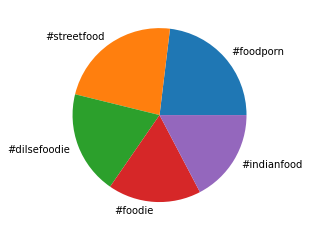

In [9]:
#slice the top 5 hashtags and store them to separate list and then plot a pie chart 
s=s[:5]
for i in s:
    print(i[0],i[1])
x=list()
y=list()
for i in s:
    x.append(i[0])
    y.append(i[1])
plt.pie(y,labels=x)
print()